# Breve tutorial de PyTorch

[PyTorch](https://pytorch.org)  es una librería de alto nivel para Python que provee 

1. Una clase tensor para hacer cómputo de alto rendimiento con capacidad de auto-diferenciación
1. Un plataforma para crear y entrenar redes neuronales

En tutorial revisaremos en detalle como se crean y manipulan tensores. Luego veremos como el submódulo `torch.nn` para crear redes neuronales artificiales


**Instalación**

Lo más recomendable para instalar esta librería es crear un ambiente de desarrollo con `conda` y ejecutar

    conda install pytorch torchvision cudatoolkit=11.3 ignite -c pytorch

en caso de tener GPU o con 

    conda install pytorch torchvision cpuonly ignite -c pytorch
    
sino se cuenta con GPU

:::{seealso}

Si no haz utilizado `conda` recomiendo revisar [aquí](https://phuijse.github.io/PythonBook/contents/preliminaries/env_management.html#conda)

:::

In [1]:
import torch
torch.__version__

'1.11.0'

## Objeto `Tensor`

La clase [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) es muy similar en uso al `ndarray` de [*NumPy*](https://numpy.org/). Un tensor corresponde a una matriz o arreglo n-dimensional con tipo definido que soporta operaciónes vectoriales de tipo [SIMD](https://es.wikipedia.org/wiki/SIMD) y broadcasting


<img src="img/tensor.png" width="700">

A continuación revisaremos las operaciones más fundamentales relacionadas a tensores

**Creación de tensores**

Un tensor puede crearse usando 

- constructores de torch 
- a partir de listas de Python o *ndarray* de NumPy

Por ejemplo para crear un vector de largo 10 relleno de ceros:

In [2]:
torch.zeros(10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Un vector de largo 10 relleno de unos:

In [3]:
torch.ones(10)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Un vector con 10 números partiendo en cero y terminando en nueve

In [4]:
torch.linspace(0, 9, steps=10)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Un tensor construido a partir de una lista:

In [5]:
una_lista = [0, 1, 2, 3, 4, 5, 6]
torch.Tensor(una_lista)

tensor([0., 1., 2., 3., 4., 5., 6.])

Un tensor construido a partir de un ndarray

In [6]:
import numpy as np
numpy_array = np.random.randn(10)
torch.from_numpy(numpy_array)

tensor([ 2.3634,  0.7277,  1.7162, -0.4610,  0.7706, -0.7328,  0.5429, -0.3567,
         0.4777, -1.4907], dtype=torch.float64)

**De PyTorch a NumPy**

Para convertir un tensor de pytorch a un ndarray de numpy se utiliza el método `numpy()`:

In [7]:
data = torch.randn(5)
data

tensor([ 0.9727, -0.7704, -0.9177,  2.9054, -0.0273])

In [8]:
data.numpy()

array([ 0.97273713, -0.770423  , -0.9177197 ,  2.905431  , -0.02733249],
      dtype=float32)

**Atributos importantes de los tensores**

Un tensor tiene un tamaño (dimesiones) y tipo específico. Esto se consulta con los atributos `ndim`/`shape` y `dtype`



In [9]:
a = torch.randn(10, 20, 30)
a.ndim, a.shape, a.dtype

(3, torch.Size([10, 20, 30]), torch.float32)

Un tensor puede estar alojado en la memoria del sistema ('cpu') o en la memoria de dispositivo ('gpu'), esto se consulta con el atributo `device`:

In [10]:
a.device

device(type='cpu')

Cuando se crea un tensor se puede especificar el tipo y el dispositivo

In [11]:
a = torch.zeros(10, dtype=torch.int32, device='cpu')
display(a)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

**Manipulación de tensores**

Sea el siguiente tensor de una dimensión:

In [12]:
a = torch.linspace(0, 9, 10)
a

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Podemos reorganizar las dimensiones del tensor con el método `reshape`:

In [13]:
b = a.reshape(2, 5)
b

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

Podemos transponer el método `transpose()` o su alias `T`

In [14]:
b.T

tensor([[0., 5.],
        [1., 6.],
        [2., 7.],
        [3., 8.],
        [4., 9.]])

Podemos convertir un tensor de dimensión arbitraria a uno de una dimensión con `flatten()`

In [15]:
b.flatten()

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Podemos agregar una dimensión en una posición arbitraria con `unsqueeze(d)`

In [16]:
c = b.unsqueeze(1)
c, c.shape

(tensor([[[0., 1., 2., 3., 4.]],
 
         [[5., 6., 7., 8., 9.]]]),
 torch.Size([2, 1, 5]))

**Cálculos con tensores**

Un tensor soporta operaciones aritméticas y lógicas

:::{note}

Si el tensor está en memoria de sistema entonces las operaciones son realizadas por la CPU 

:::

In [17]:
data = torch.linspace(0, 5, steps=6)
data

tensor([0., 1., 2., 3., 4., 5.])

Algunos ejemplos de operaciones aritméticas

In [18]:
data + 5

tensor([ 5.,  6.,  7.,  8.,  9., 10.])

In [19]:
2*data

tensor([ 0.,  2.,  4.,  6.,  8., 10.])

In [20]:
data.pow(2)

tensor([ 0.,  1.,  4.,  9., 16., 25.])

In [21]:
data.log()

tensor([  -inf, 0.0000, 0.6931, 1.0986, 1.3863, 1.6094])

Una operación lógica puede utilizarse para filtrar un tensor:

In [22]:
mask = data > 3
mask

tensor([False, False, False, False,  True,  True])

In [23]:
data[mask]

tensor([4., 5.])

Un ejemplo de broadcasting:

In [24]:
data2 = torch.ones(6)
data.unsqueeze(1), data2.unsqueeze(0), data.unsqueeze(1)*data2.unsqueeze(0)

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.]]),
 tensor([[1., 1., 1., 1., 1., 1.]]),
 tensor([[0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1.],
         [2., 2., 2., 2., 2., 2.],
         [3., 3., 3., 3., 3., 3.],
         [4., 4., 4., 4., 4., 4.],
         [5., 5., 5., 5., 5., 5.]]))

**Cálculos en GPU**

Usando el atributo `to` podemos intercambiar un tensor entre memoría de GPU ('device') y CPU ('host')

```python
data = torch.zeros(10)
data = data.to('cuda')
```

:::{important}

Cuando todos los tensores involucrados en una operaciones están en memoria de dispositivo entonces el cálculo lo hace la GPU

:::

La siguiente nota indica las opciones para intercambiar datos entre GPU y CPU que ofrece PyTorch: https://pytorch.org/docs/stable/notes/cuda.html 

:::{note}

Una *Graphical Processing Unit* (GPU) o tarjeta de video es un hardware para hacer cálculos sobre mallas tridimensionales, generación de imágenes (rendering) y otras tareas gráficas. A diferencia de la CPU, la GPU es especialista en cálculo paralelo y tiene miles de nucleos (NVIDIA RTX 2080: 2944 nucleos)

:::



## Auto-diferenciación con Tensores

En general, las redes neuronales se entrenan usando **Gradiente descedente**. Por lo tanto necesitamos calcular las derivadas de la función de costo para todos los parámetros de la red

PyTorch tiene incorporado un sistema de diferenciación automática denominado [`autograd`](https://pytorch.org/docs/stable/autograd.html) 

Para poder derivar una función en pytorch

1. Se necesita que su entrada sean tensores con el atributo `requires_grad=True`
1. Luego llamamos la función `backward()` de la función
1. El resultado queda guardado en el atributo `grad` de la entrada (nodo hoja)

**Ejemplo**

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt

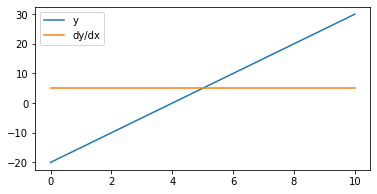

In [26]:
x = torch.linspace(0, 10, steps=1000, requires_grad=True)
y = 5*x - 20
y.backward(torch.ones_like(x))

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x.detach().numpy(), y.detach().numpy(), label='y')
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dy/dx')
plt.legend();

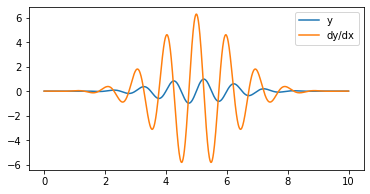

In [27]:
x = torch.linspace(0, 10, steps=1000, requires_grad=True)
y = torch.sin(2.0*np.pi*x)*torch.exp(-(x-5).pow(2)/3)
y.backward(torch.ones_like(x))

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x.detach().numpy(), y.detach().numpy(), label='y')
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dy/dx')
plt.legend();

Comparado con la derivada calculada "a mano":

In [28]:
dydx = 2*torch.pi*torch.cos(2.0*np.pi*x)*torch.exp(-(x-5).pow(2)/3) - 2/3*(x-5)*torch.sin(2.0*np.pi*x)*torch.exp(-(x-5).pow(2)/3)
torch.sum(torch.pow(x.grad.detach() - dydx, 2))

tensor(1.1211e-11, grad_fn=<SumBackward0>)

## Grafo de cómputo

Cuando concatenamos operacionesm PyTorch construye internamente un "grafo de cómputo"

$$
x \to z = f_1(x) \to y = f_2(z)
$$

El método `backward()` calcula los gradientes y los almacena en los nodo hoja que tengan `requires_grad=True`

Por ejemplo

    y.backward : Guarda dy/dx en x.grad
    
    z.backward : Guarda dz/dx en x.grad

:::{note}

`backward()` implementa la regla de la cadena de las derivadas

:::

`backward` recibe una entrada: La derivada de la etapa superior de la cadena. Por defecto usa `torch.ones([1])`, es decir que asume que está en el nivel superior del grafo y que la salida es escalar (unidimensional)

In [29]:
x = torch.linspace(0, 10, steps=1000, requires_grad=True) # Nodo hoja
x.grad_fn

In [30]:
z = torch.sin(2*x)
z.grad_fn

In [31]:
y = z.pow(2)/2
y.grad_fn

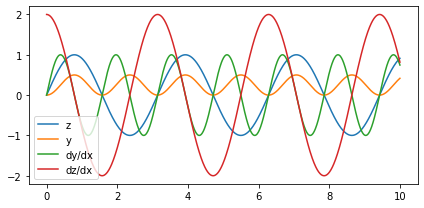

In [32]:
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(x.detach().numpy(), z.detach().numpy(), label='z')
ax.plot(x.detach().numpy(), y.detach().numpy(), label='y')
# Derivada dy/dx
y.backward(torch.ones_like(x), retain_graph=True)
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dy/dx')
# Borro el resultado en x.grad
x.grad = None
# Derivada dz/dx
z.backward(torch.ones_like(x))
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dz/dx')
plt.legend();

:::{note}

El método `detach()` retorna una copia del tensor que se ha "despegado" del grafo

:::

## Construcción de redes neuronales

PyTorch nos ofrece la clase tensor y las funcionalidades de autograd. Estas poderosas herramientas nos dan todo lo necesario para construir y entrenar redes neuronales artificiales

Para facilitar aun más estas tareas PyTorch tiene módulos de alto nivel que implementan

1. Modelo base de red neuronal: `torch.nn.Module`
1. Distintos tipos de capas, funciones de activación y funciones de costo: [`torch.nn`](https://pytorch.org/docs/stable/nn.html)
1. Distintos algoritmos de optimización basados en gradiente descedente: [`torch.optim`](https://pytorch.org/docs/stable/optim.html)


Una red neuronal en PyTorch es una clase de Python que hereda de [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Como mínimo esta clase debe implementar las funciones `__init__` y `forward`

- El constructor define las capas que se utilizaran
- Heredar de `nn.Module` hace que los parámetros de las capas queden registrados por la máquina de estado de PyTorch
- La función `forward` recibe como argumento los datos de entrada y retorna la predicción del modelo, es decir que define como se conectan las capas

:::{note}

La función `forward()` actua como la función `__call__()` de Python, es decir que se creamos una objeto `model` que herada de `nn.Module` llamar `model.forward(x)` es equivalente a `model(x)`

:::

### Capa completamente conectada

Una capa completamente conectada (*fully-connected*) también llamada capa densa, implementa la siguiente operación

$$
z = wx + b
$$

donde $x$ son los datos que entran en la capa y $w/b$ son los parámetros de la capa (pesos y sesgos) de la capa

Esta capa está implementada en Pytorch como [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear). El constructor de este objeto espera la dimensionalidad (número de neuronas) de entrada y salida de la capa

Por ejemplo para crear una capa como el siguiente diagrama



usariamos

```python
dense = torch.nn.Linear(3, 2)
```

Una vez creada la podemos evaluar con `dense(data)` o `dense.forward(data)`

:::{note}

Las capas son a su vez instancias de `torch.nn.Module`. Es decir que un módulo puede tener otros módulos anidados

:::

### Funciones de activación 

Las funciones de activación más comunes de la literatura están implementadas como clases en [`torch.nn`](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)

Veamos algunos ejemplos para aprender a utilizarlas:

In [33]:
data = torch.linspace(-5, 5, steps=100)

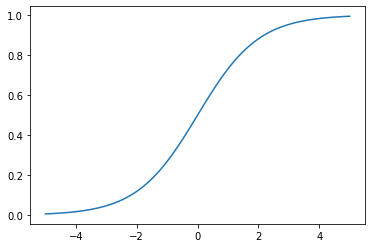

In [34]:
activation = torch.nn.Sigmoid()

fig, ax = plt.subplots()
ax.plot(data.detach(), activation(data).detach());

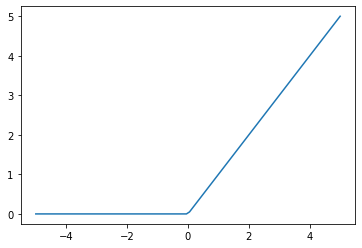

In [35]:
activation = torch.nn.ReLU()

fig, ax = plt.subplots()
ax.plot(data.detach(), activation(data).detach());

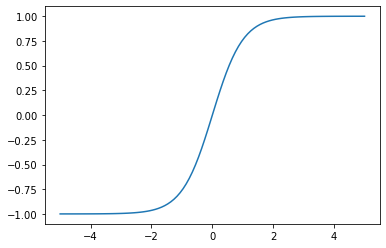

In [36]:
activation = torch.nn.Tanh()

fig, ax = plt.subplots()
ax.plot(data.detach(), activation(data).detach());

### Perceptron multicapa en Pytorch

Utilicemos lo aprendio para implementar un perceptrón multicapa con una capa oculta y función de activación sigmoide:

In [37]:
import torch
import torch.nn as nn

class MultiLayerPerceptron(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim): 
        super(type(self), self).__init__()  
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)        
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.hidden(x))
        return self.output(x)

Crear una capa `Linear` hace que se registren sus parámetros `weight` y `bias` en el grafo. Inicialmente los parámetros tienen valores aleatorios

In [38]:
model = MultiLayerPerceptron(input_dim=2, output_dim=1, hidden_dim=2)
model.hidden.weight, model.hidden.bias

(Parameter containing:
 tensor([[0.6125, 0.4714],
         [0.0419, 0.5960]], requires_grad=True),
 Parameter containing:
 tensor([-0.2803,  0.3135], requires_grad=True))

In [39]:
model.output.weight, model.output.bias

(Parameter containing:
 tensor([[-0.1091, -0.2248]], requires_grad=True),
 Parameter containing:
 tensor([-0.2507], requires_grad=True))

El modelo se evalua sobre un tensor de datos llamando a su función `forward`

In [40]:
X = 10*torch.rand(10000, 2) - 5
Y = model(X)

PyTorch también admite una forma "más funcional" de crear modelos utilizando [`torch.nn.Sequential`](https://pytorch.org/docs/stable/nn.html#sequential)

El modelo anterior sería:

In [41]:
model = nn.Sequential(nn.Linear(2, 2),
                      nn.Sigmoid(),
                      nn.Linear(2, 1))

Esta forma de crear modelos es más consisa pero menos reutilizable